<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Census-data" data-toc-modified-id="Census-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Census data</a></span><ul class="toc-item"><li><span><a href="#Merging-the-datasets" data-toc-modified-id="Merging-the-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Merging the datasets</a></span><ul class="toc-item"><li><span><a href="#Function-to-read-the-combined-data" data-toc-modified-id="Function-to-read-the-combined-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Function to read the combined data</a></span></li></ul></li></ul></li><li><span><a href="#Cleaning-the-data" data-toc-modified-id="Cleaning-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning the data</a></span><ul class="toc-item"><li><span><a href="#Removing-unwanted-expressions" data-toc-modified-id="Removing-unwanted-expressions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing unwanted expressions</a></span></li><li><span><a href="#Checking-for-nans" data-toc-modified-id="Checking-for-nans-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking for <code>nan</code>s</a></span></li><li><span><a href="#Checking-for-duplicates" data-toc-modified-id="Checking-for-duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Checking for duplicates</a></span></li><li><span><a href="#Converting-datatypes" data-toc-modified-id="Converting-datatypes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Converting datatypes</a></span></li></ul></li><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scatterplot</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Histograms</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Census data

The data used in this project is US census data for 10 states. Each state has its own csv file.

The aim is to combine the data, clean it, and prepare it for analysis.

The data can then be put to use to make some graphs - namely a scatterplot and some histograms.

*note - this project is only using a small sample of data from the full US census - the purpose is to put into practice data cleaning and then do some modeling on the result.*

In [2]:
states_0 = pd.read_csv('states0.csv')
states_0.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


The data files follow the naming convention "states(NUMBER).csv" - so we can combine them and read them in with a script

## Merging the datasets

In [3]:
# merge all the census data files together
census_files_combined = glob.glob('states[0-9].csv')

In [4]:
census_files_combined

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

### Function to read the combined data

In [5]:
us_census_data = []
for file in census_files_combined:
    data = pd.read_csv(file)
    us_census_data.append(data)
    
# join the DataFrames together to get a continuous DataFrame:
us_census = pd.concat(us_census_data)
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [6]:
# finding out what datatypes are present in each column of the data
print(us_census.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


The majority of the columns are *non-numeric*, which is likely going to mean that at least some of them will need to be changed in order to model the data.

In [7]:
us_census.shape

(60, 11)

In [8]:
us_census.head(1)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F


# Cleaning the data

## Removing unwanted expressions

In [9]:
# using regex to turn the 'Income' column into a data format that is ready for conversion to numeric, i.e. remove the '$' sign:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True)

In [10]:
# splitting the 'GenderPop' column into two columns - male and female:
gender_pop_split = us_census.GenderPop.str.split('_') # split at the underscore

# the M for male is the first letter in each entry, so use index 0
us_census['Men'] = gender_pop_split.str.get(0)
# the F for female is the second letter in each entry, so use index 1
us_census['Women'] = gender_pop_split.str.get(1)

In [11]:
# the numbers in the Men and Women columns still have 'M' or 'F' at the end of them
# Need to remove before converting from object to numeric.
us_census['Men'] = us_census['Men'].replace('[M]', '', regex=True)
us_census['Women'] = us_census['Women'].replace('[F]', '', regex=True)

In [12]:
# converting both columns to numeric:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

## Checking for `nan`s

In [13]:
us_census.isna().any()

Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific        True
Income        False
GenderPop     False
Men           False
Women          True
dtype: bool

In [14]:
# the Women column has 'nan' entries - need to replace them
# for these nan entries, we can estimate their value would be the total state population minus the Men in that state:
us_census = us_census.fillna(value={'Women':us_census['TotalPop'] - us_census['Men']})

In [15]:
print(us_census.Women)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64


In [16]:
# there are "nan" values in the Pacific ethnicity column
# Before we can plot the histogram, these nan values will have to be replaced with something else
# can assume that there's nobody of Pacific descent in these states, so set nan=0:
us_census = us_census.fillna(value={'Pacific': us_census['Pacific']=='0'}) 

## Checking for duplicates

In [17]:
# check for duplicates
duplicates = us_census.duplicated()

In [18]:
duplicates.any()

False

## Converting datatypes

Below is a function that will take in a number and round it to one decimal place. It will be used to apply to the `Income` column before plotting

In [19]:
def round_num(number):
    new_num=np.round(int(number), decimals=1)
    return new_num

In [20]:
# printing the DataFrame info and the datatypes once more
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     60 non-null     object 
 9   Income      60 non-null     object 
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       60 non-null     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 6.6+ KB


In [21]:
# converting the Income column to numeric
us_census['Income'] = pd.to_numeric(us_census['Income'])

In [22]:
# applying the rounding function to the Income column
us_census['Income'] = us_census['Income'].apply(round_num)

# Scatterplot

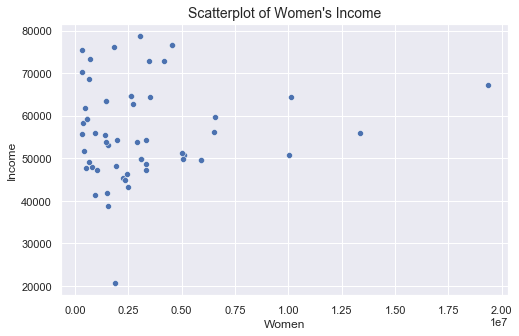

In [23]:
# arbitrarily choose to plot women vs income
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))

sns.scatterplot(data=us_census, x="Women", y="Income").set_title("Scatterplot of Women's Income", fontsize=14)
plt.show()
plt.close()

# Histograms

It will be interesting to plot the demography of the US using the data (while remembering that this is only a sample and is unlikely to accurately reflect the whole population).

We can plot this on multiple axes within the same plot.

In [24]:
# before plotting histograms, need to remove unwanted characters
# will have to get rid of the '%' signs in each row, and convert each column to numeric
# getting rid of all % signs:
us_census['Hispanic']= us_census['Hispanic'].replace('[\%,]', '', regex=True)
us_census['White']= us_census['White'].replace('[\%,]', '', regex=True)
us_census['Black']= us_census['Black'].replace('[\%,]', '', regex=True)
us_census['Native']= us_census['Native'].replace('[\%,]', '', regex=True)
us_census['Asian']= us_census['Asian'].replace('[\%,]', '', regex=True)
us_census['Pacific']= us_census['Pacific'].replace('[\%,]', '', regex=True)
# then convert all the columns to numeric:
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
us_census['White'] = pd.to_numeric(us_census['White'])
us_census['Black'] = pd.to_numeric(us_census['Black'])
us_census['Native'] = pd.to_numeric(us_census['Native'])
us_census['Asian'] = pd.to_numeric(us_census['Asian'])
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])

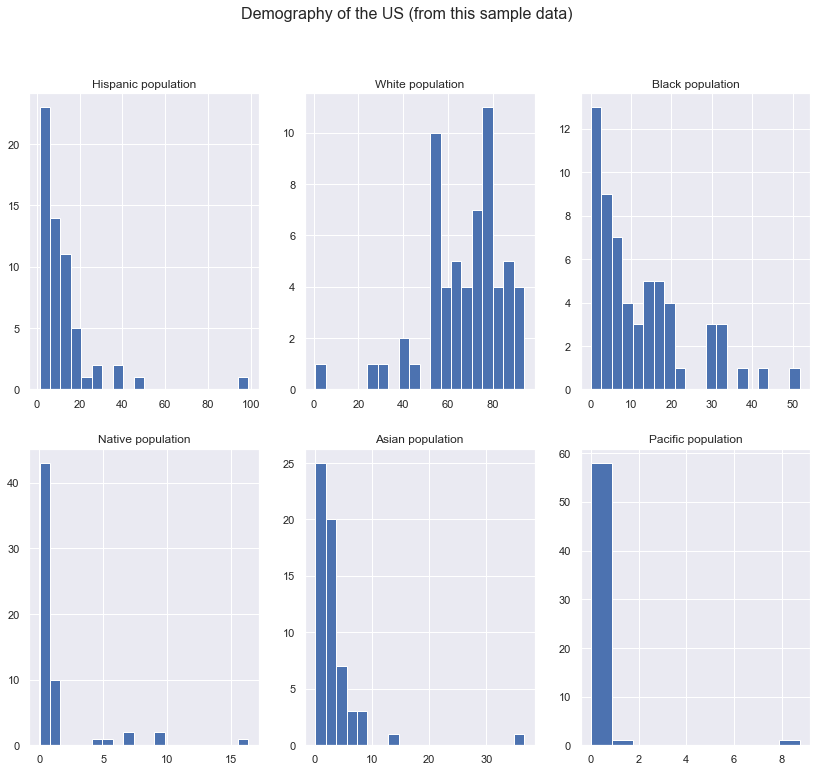

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(14, 12))
plt.suptitle('Demography of the US (from this sample data)', fontsize=16)

ax1 = plt.subplot(2, 3, 1).set_title('Hispanic population')
ax1 = plt.hist(us_census.Hispanic, bins=20)

ax2 = plt.subplot(2, 3, 2).set_title('White population')
ax2 = plt.hist(us_census.White, bins=20)

ax3 = plt.subplot(2, 3, 3).set_title('Black population')
ax3 = plt.hist(us_census.Black, bins=20)

ax4 = plt.subplot(2, 3, 4).set_title('Native population')
ax4 = plt.hist(us_census.Native, bins=20)

ax5 = plt.subplot(2, 3, 5).set_title('Asian population')
ax5 = plt.hist(us_census.Asian, bins=20)

ax6 = plt.subplot(2, 3, 6).set_title('Pacific population')
ax6 = plt.hist(us_census.Pacific)
plt.show()
plt.close()